In [1]:
!ls

 benchmark.py			    optimizer.py
 create_sets.py			    pressure_check.ipynb
 data				    __pycache__
 data1.tar.bz2			    README.md
 df.py				    SCT.py
 feed_test_properties_database.py   TCT.py
 helper_functions_titanlib.py	    test_properties.csv
"my_titanlib'.py"		    titanlib_test.ipynb
 my_titanlib.py


In [2]:
import os
import numpy as np
import pandas as pd
from df import df
import titanlib

print(df)



       station           timestamp     min      max            file_type
0       4201.0 1997-06-10 00:00:00  1008.7  1012.45  data/data1/combined
1       4201.0 1997-06-10 01:00:00  1009.0  1012.76  data/data1/combined
2       4201.0 1997-06-10 02:00:00  1009.2  1012.96  data/data1/combined
3       4201.0 1997-06-10 03:00:00  1009.2  1012.98  data/data1/combined
4       4201.0 1997-06-10 04:00:00  1009.5  1013.28  data/data1/combined
...        ...                 ...     ...      ...                  ...
67628   6193.0 1997-06-28 09:00:00  1007.3  1008.60  data/data1/combined
67629   6193.0 1997-06-28 12:00:00  1008.3  1009.60  data/data1/combined
67630   6193.0 1997-06-28 15:00:00  1010.1  1011.40  data/data1/combined
67631   6193.0 1997-06-28 18:00:00  1011.4  1012.70  data/data1/combined
67632   6193.0 1997-06-28 21:00:00  1012.6  1013.90  data/data1/combined

[67633 rows x 5 columns]


In [3]:
from scipy.interpolate import interp1d
from create_sets import create_sets
import datetime
from helper_functions_titanlib import prepare_test

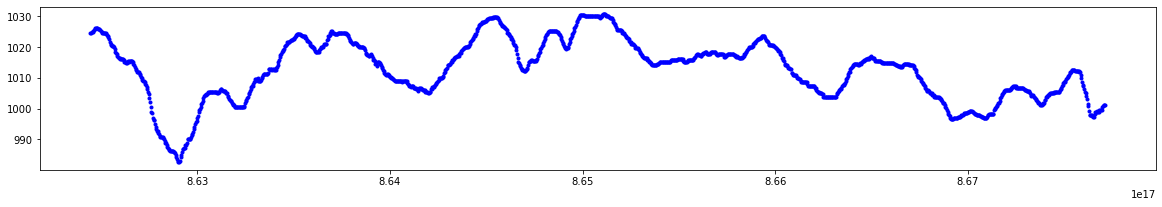

In [4]:
import matplotlib.pyplot as plt
import time
import titanlib
import datetime

threshold = 2 # TO BE OPTIMIZED
max_elev_diff = -1 #200
elev_gradient = -0.0065
min_std = 1 # TO BE OPTIMIZED
radius= [90000] # TO BE OPTIMIZED
num_min=[4] # TO BE OPTIMIZED ?
num_iterations = 50
obs_to_check= [1,0,0,0,0,0,0,0]

plt.figure(figsize=(20,3))

xs, _ = create_sets(6096)

fs, points, obs_to_check= prepare_test(6096)
values=[]

obs_to_check=lst = [1]+[0] * (len(fs)-1)

for x in xs:
    values=[]
    for f in fs:
        values.append(f(x).tolist())
    
    flags=titanlib.buddy_check(points, values,  radius ,num_min,threshold, max_elev_diff, elev_gradient, min_std, num_iterations,obs_to_check)
    if(flags[0]==1):
        plt.plot(x, values[0], 'r.')
    else:
        plt.plot(x, values[0], 'b.')

In [5]:
from benchmark import calculate_acc

from my_titanlib import my_SCT, my_buddy_check

In [6]:
xs, f = create_sets(6096)

t1=time.time()
acc= calculate_acc(xs, f, my_SCT(6096),[2,4,50000, 150000], std=3.,n_trials=1000)
print(time.time()-t1)
#TODO: Optimize the parameters





print(acc)

3.2708845138549805
[[0.72 0.28]
 [0.41 0.59]]


In [7]:
!pip install bayesian-optimization

|   iter    |  target   |    p0     |    p1     |    p2     |
-------------------------------------------------------------
|  1        |  0.5      |  0.5417   |  2.161    |  3.001e+0 |
|  2        |  0.5      |  0.5302   |  0.4403   |  3.646e+0 |
|  3        |  0.5      |  0.5186   |  1.037    |  5.777e+0 |
|  4        |  0.5      |  0.5539   |  1.258    |  7.797e+0 |
|  5        |  0.5      |  0.5204   |  2.634    |  3.192e+0 |
|  6        |  0.5      |  0.567    |  1.252    |  6.911e+0 |
|  7        |  0.5      |  0.514    |  0.5943   |  8.605e+0 |
|  8        |  0.5      |  0.5968   |  0.9403   |  7.846e+0 |
|  9        |  0.5      |  0.5876   |  2.684    |  3.595e+0 |
|  10       |  0.5      |  0.5039   |  0.5095   |  9.147e+0 |
|  11       |  0.5      |  0.5486   |  2.443    |  4.031e+0 |
|  12       |  0.5      |  0.5416   |  2.49     |  3e+04    |
|  13       |  0.5      |  0.5474   |  2.526    |  3.34e+04 |
|  14       |  0.5      |  0.5493   |  1.905    |  3e+04    |
|  15   

KeyboardInterrupt: 

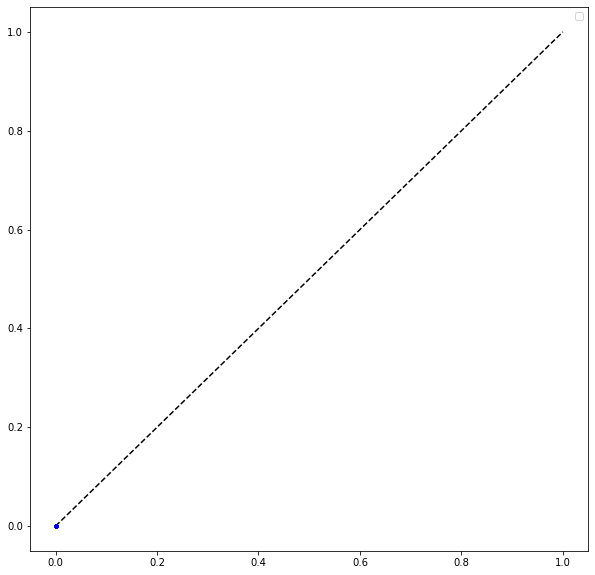

In [10]:
from optimizer import optimize_test
from SCT import build_pdfs
from my_titanlib import my_SCT, my_buddy_check
import matplotlib.pyplot as plt
plot=True
if plot==True:
        plt.figure(figsize=(10,10))

        plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), 'k--')

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

xs, f = create_sets(4242)
best=optimize_test(4242, 'buddy_check', std=1.5, plot=plot)
print(best)
acc= calculate_acc(xs, f, my_buddy_check(4242)[0],list(best['params'].values())
, std=1.5, n_trials=10000)
print(acc)

In [ ]:
import pandas as pd
test_properties= pd.read_csv('test_properties.csv')

In [ ]:
test_properties